## PCA (Principal Component Analysis)
## LDA (Linear Discriminant Analysis)
## T-SNE (T- distributed Stochastic Neighbor Embedding)

https://medium.com/analytics-vidhya/feature-extraction-techniques-pca-lda-and-t-sne-df0459c723aa

# Standardization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/saad/Downloads/tested.csv',  usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.shape

(418, 3)

## Missing Values

In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
# so there is null values so i am going to remove it
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,-3]

In [8]:
# convert into train and test parts
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.05, random_state=True)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)

Shape of X_train is:  (397, 2)
Shape of X_test is:  (21, 2)


## Standard Scalar

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
# now i scale down the fare and age columns

In [12]:
scaler.fit(X_train) # here he take the mean and standard deviation of independent features in X_train

StandardScaler()

In [13]:
scaler.mean_

array([29.69395466, 36.4598869 ])

In [14]:
# here it applies the formula
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# now i convert the transformed data into data frame because when i apply the scaling it automatically
# convert the data into array form


In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
np.round(X_train.describe(), 1)

,Age,Fare
count,397.0,397.0
mean,29.7,36.5
std,12.7,57.1
min,0.2,0.0
25%,23.0,7.9
50%,27.0,14.5
75%,36.0,31.5
max,76.0,512.3


In [18]:
np.round(X_train_scaled.describe(), 1)

,Age,Fare
count,397.0,397.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.3,-0.6
25%,-0.5,-0.5
50%,-0.2,-0.4
75%,0.5,-0.1
max,3.7,8.3


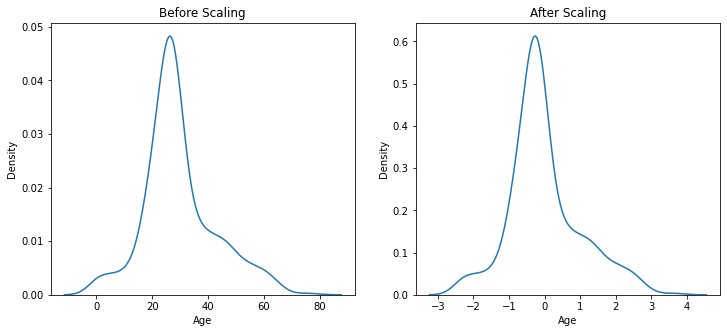

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

Text(0.5, 1.0, 'After Scaling')

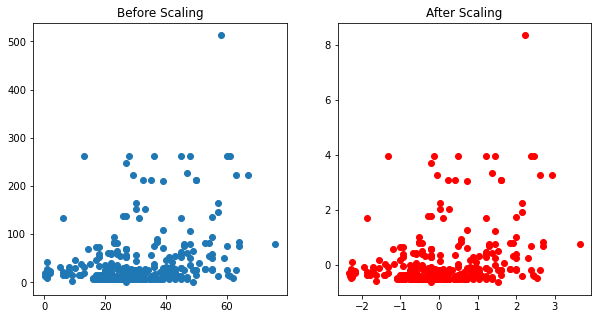

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_train['Age'], X_train['Fare'])
plt.title("Before Scaling")
plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['Fare'], color='r')
plt.title("After Scaling")

Text(0.5, 1.0, 'After Scaling')

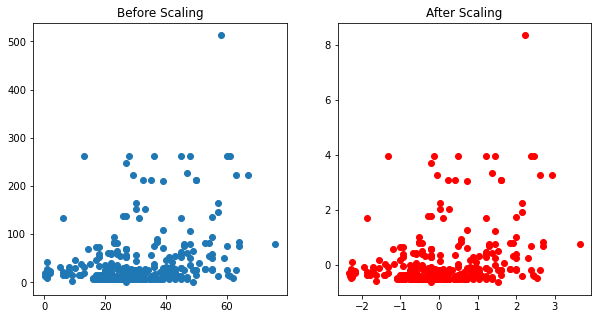

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Fare'], color='r')
ax2.set_title("After Scaling")

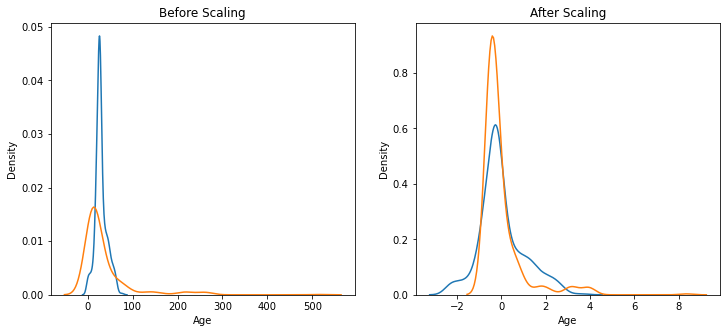

In [22]:
# let's plot the pdf (probability density function)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)  # kernel density estimation plot(kdeplot)
sns.kdeplot(X_train['Fare'], ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)
plt.show()

## Why Scaling is important?

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression # it's a classification problem
# so i use logistic regression model

In [24]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print("Actual",accuracy_score(y_test, y_pred))
print("Scaled",accuracy_score(y_test, y_pred_scaled))

Actual 0.7142857142857143
Scaled 0.7142857142857143


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [31]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [33]:
print("Actual",accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6190476190476191
Scaled 0.6190476190476191


# All Process on Another Dataset

In [34]:
df = pd.read_csv('/home/saad/Downloads/Social_Network_Ads.csv',  usecols=['Age','EstimatedSalary','Purchased'])
df.sample(5)

,Age,EstimatedSalary,Purchased
208,40,142000,1
399,49,36000,1
197,20,36000,0
131,33,31000,0
371,60,83000,1


In [35]:
df.shape

(400, 3)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],
                                                    test_size=0.3, random_state=True)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Age', ylabel='Density'>

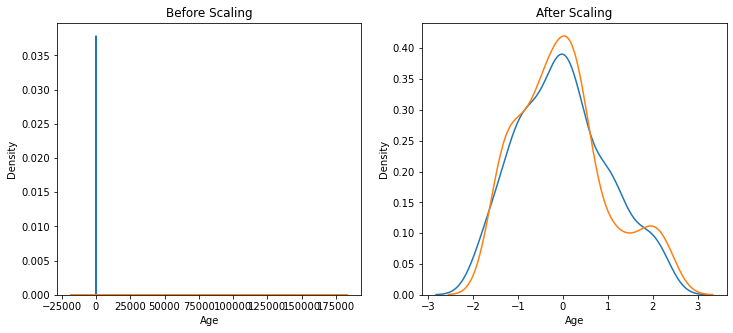

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

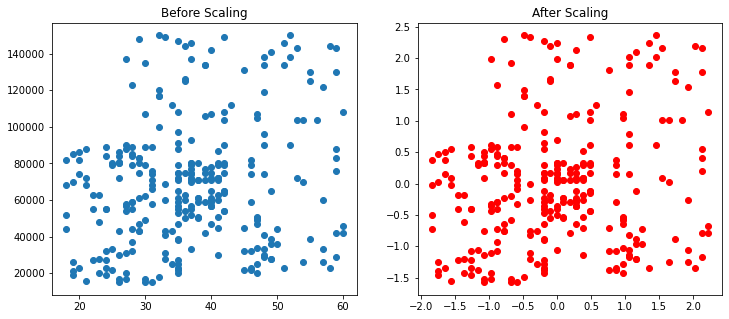

In [43]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='r')
plt.show()

## Why Scaling is Important?

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()
lr.scaled = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [48]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6
Scaled 0.825


In [49]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outliers

In [50]:
# for checking the outliers i add some outliers in my dataset to going some practical on it
df = df.append(pd.DataFrame({'Age':[9,90,89], 'EstimatedSalary':[1000,400000,350000], 
                        'Purchased':[0,1,1]}), ignore_index=True)

In [51]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.841191,71086.848635,0.359801
std,11.155820,40380.342254,0.480539
min,9.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,90.000000,400000.000000,1.000000


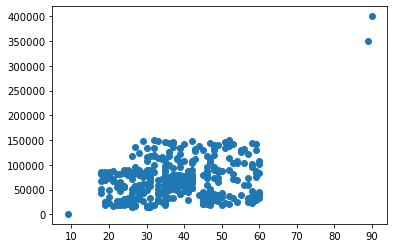

In [52]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'], test_size=0.3, random_state=True)

In [54]:
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

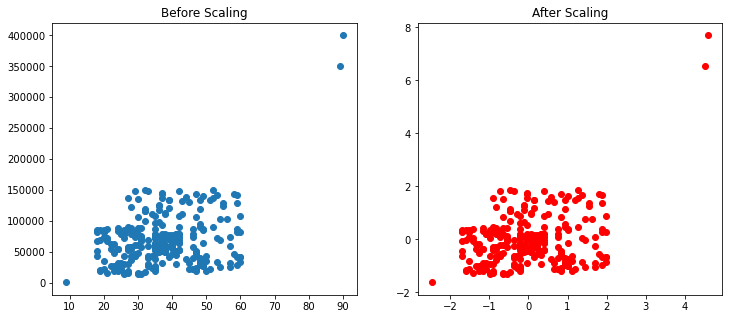

In [56]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='r')
plt.show()

In [57]:
# So we can see that after scaling there is no effect on outliers